In [44]:
import torch
from torch import tensor
from torch import quantile

import pyro
import pyro.distributions as dist
import pyro.ops.stats as stats

from matplotlib import pyplot as plt
import seaborn as sns

In [31]:
p_grid = torch.linspace(start=0, end=1, steps=1000)
prior = torch.tensor(1.).repeat(1000)
likelihood = dist.Binomial(total_count=9,
                           probs=p_grid).log_prob(torch.tensor(6.)).exp()
posterior = likelihood * prior
posterior = posterior / posterior.sum()
torch.manual_seed(100)
samples = dist.Empirical(p_grid, posterior.log()).sample(torch.Size([int(1e4)]))

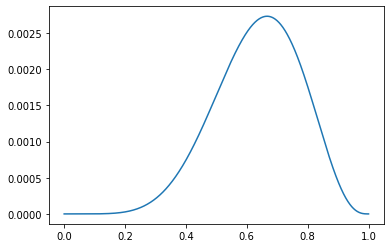

In [32]:
# plot actual posterior
plt.plot(p_grid, posterior)

<AxesSubplot:ylabel='Count'>

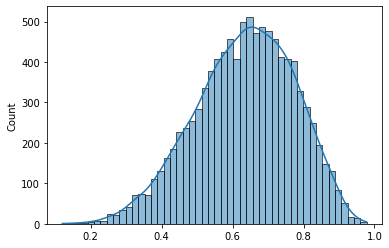

In [33]:
# plot posterior samples
sns.histplot(samples, kde=True)

## 3E1

In [34]:
sum(samples < 0.2) / len(samples)

tensor(0.0010)

## 3E2

In [35]:
sum(samples > 0.8) / len(samples)

tensor(0.1166)

## 3E3

In [36]:
sum((samples > 0.2) & (samples < 0.8)) / len(samples)

tensor(0.8824)

## 3E4

In [38]:
quantile(samples, 0.2)

tensor(0.5155)

## 3E5

In [39]:
quantile(samples, 0.8)

tensor(0.7588)

## 3E6

In [42]:
stats.hpdi(samples, 0.66)

tensor([0.5155, 0.7858])

## 3E7

In [43]:
stats.pi(samples, 0.66)

tensor([0.4965, 0.7718])

## 3M1

In [47]:
n_steps = 1_000
p_grid = torch.linspace(start=0, end=1., steps=n_steps)
prior = tensor([1.] * n_steps)
likelihood = dist.Binomial(total_count=15, probs=p_grid).log_prob(tensor(8.)).exp()
posterior = prior * likelihood
posterior = posterior / sum(posterior)

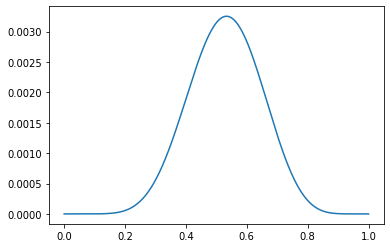

In [50]:
plt.plot(p_grid, posterior)

## 3M2

In [56]:
samples = dist.Empirical(p_grid, posterior.log()).sample(torch.Size([int(1e4)]))

<AxesSubplot:>

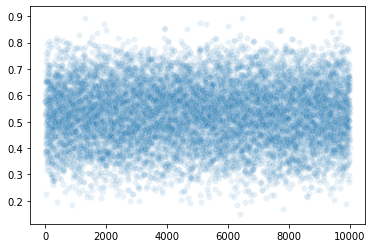

In [62]:
sns.scatterplot(x=range(len(samples)), y=samples, alpha=0.1)

In [64]:
stats.hpdi(samples, 0.9)

tensor([0.3353, 0.7197])

## 3M3

In [72]:
w = dist.Binomial(total_count=15, probs=samples).sample()

In [75]:
# posterior predictive check
sum(w==8) / len(w)

tensor(0.1488)

<AxesSubplot:ylabel='Count'>

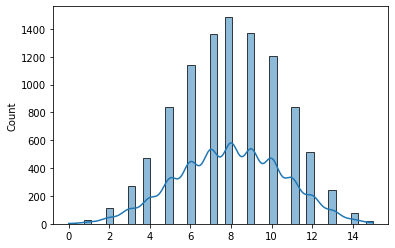

In [77]:
sns.histplot(w, kde=True)

## 3M4

In [79]:
w = dist.Binomial(total_count=9, probs=samples).sample()
sum(w==6) / len(w)

tensor(0.1743)

## 3M5

In [89]:
n_steps = 1_000
p_grid = torch.linspace(start=0, end=1., steps=n_steps)
prior = tensor([1.] * n_steps)
prior[p_grid < 0.5] = 0.0
likelihood = dist.Binomial(total_count=15, probs=p_grid).log_prob(tensor(8.)).exp()
posterior = prior * likelihood
posterior = posterior / sum(posterior)

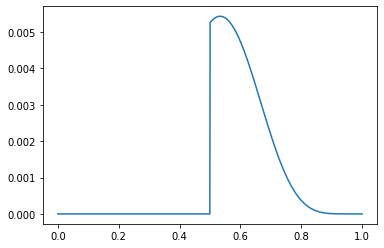

In [91]:
plt.plot(p_grid, posterior)

In [92]:
samples = dist.Empirical(p_grid, posterior.log()).sample(torch.Size([int(1e4)]))

<AxesSubplot:>

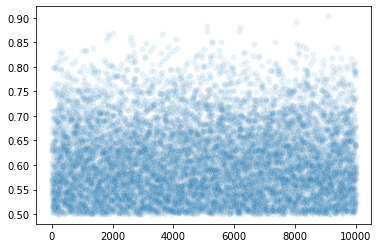

In [93]:
sns.scatterplot(x=range(len(samples)), y=samples, alpha=0.1)

In [94]:
stats.hpdi(samples, 0.9)

tensor([0.5005, 0.7117])

In [95]:
w = dist.Binomial(total_count=15, probs=samples).sample()

In [96]:
# posterior predictive check
sum(w==8) / len(w)

tensor(0.1484)

<AxesSubplot:ylabel='Count'>

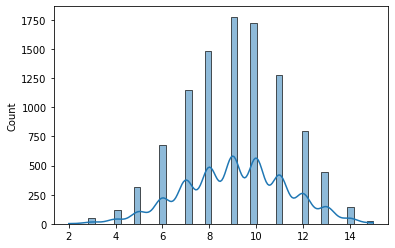

In [97]:
# posterior sampling distribution no longer centered at 8
sns.histplot(w, kde=True)

In [98]:
w = dist.Binomial(total_count=9, probs=samples).sample()
sum(w==6) / len(w)

tensor(0.2261)

## 3M6

In [124]:
def compute_pi_width(n_samples, true_p=0.7, n_steps=1_000):
    p_grid = torch.linspace(0, 1, n_steps)
    prior = tensor([1.]*n_steps)
    likelihood = dist.Binomial(total_count=n_samples, probs=p_grid).log_prob(tensor(round(true_p * n_samples))).exp()
    posterior = prior * likelihood
    posterior = posterior / sum(posterior)
    samples = dist.Empirical(p_grid, posterior.log()).sample(torch.Size([int(1e4)]))
    interval = stats.pi(samples, 0.99)
    return interval[1] - interval[0]


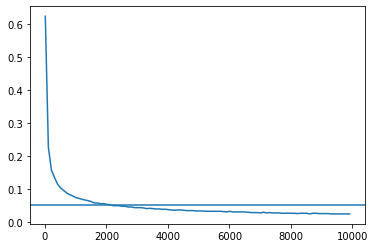

In [138]:
x = range(10, 10_000, 100)
y = []
for n in x:
    y.append(float(compute_pi_width(n)))
    
f, ax = plt.subplots()
ax.plot(x, y)
ax.axhline(0.05)

In [145]:
tensor(x)[tensor(y)<0.05][0]

tensor(2210)

## 3H1

In [146]:
birth1 = [1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
          0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
          1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
          0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1]

birth2 = [0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
          0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
          0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0]

In [223]:
tot = len(birth1) + len(birth2)
boys = sum(birth1) + sum(birth2)

print(tot)
print(boys)

200
111


In [224]:
n_steps = 1_000
p_grid = torch.linspace(0, 1, steps=n_steps)
prior = tensor([1.] * n_steps)
likelihood = dist.Binomial(total_count=tot, probs=p_grid).log_prob(tensor(boys)).exp()
posteriors = prior * likelihood
posteriors = posteriors / sum(posteriors)

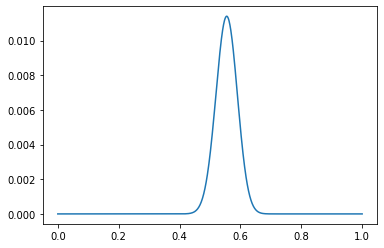

In [241]:
plt.plot(p_grid, posteriors)

In [242]:
p_grid[posteriors.argmax()]

tensor(0.5546)

## 3H2

In [216]:
samples = dist.Empirical(p_grid, posteriors.log()).sample(torch.Size([int(1e4)]))

In [217]:
stats.hpdi(samples, 0.5)

tensor([0.5275, 0.5736])

In [218]:
stats.hpdi(samples, 0.89)

tensor([0.4925, 0.6046])

In [219]:
stats.hpdi(samples, 0.97)

tensor([0.4755, 0.6256])

## 3H3

In [243]:
samples = dist.Empirical(p_grid, posteriors.log()).sample(torch.Size([int(1e4)]))

In [244]:
bsim = dist.Binomial(total_count=200, probs=samples).sample()

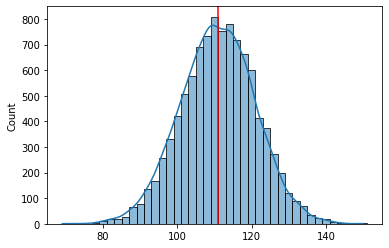

In [248]:
ax = sns.histplot(bsim, kde=True, binwidth=2)
ax.axvline(111, c='r')

## 3H4

In [249]:
b1sim = dist.Binomial(total_count=100, probs=samples).sample()

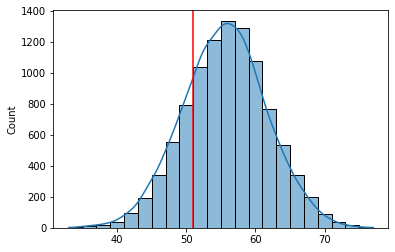

In [252]:
b1sum = sum(birth1)

ax = sns.histplot(b1sim, kde=True, binwidth=2)
ax.axvline(b1sum, c='r')

## 3H5

In [261]:
girls = 100 - sum(birth1)

In [263]:
b2sim = dist.Binomial(total_count=girls, probs=samples).sample()

In [267]:
aftergirls = sum(tensor(birth2)[tensor(birth1)==0])

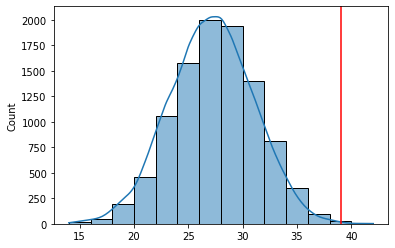

In [269]:
ax = sns.histplot(b2sim, kde=True, binwidth=2)
ax.axvline(aftergirls, c='r')

In [ ]:
# births are probably (anti-)correlated. there are more boys than expected following girls.